In [5]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
    
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    #RWR: the following has been modified to fit larger-magnitude roots and manage ticks
    r = 1.1*max(1.5/1.1,np.abs(np.concatenate((p.real,p.imag,z.real,z.imag))).max()); 
    plt.axis('scaled');
    if r<1.6:
        ticks = [-1, -.5, .5, 1]; 
    elif r<5:
        ticks = [-2,-1, -.5, .5, 1,2]; 
    elif r<10:
        ticks = [-5,-2,-1,1,2,5]; 
    elif r<20:
        ticks = [-10,-1,1,10]; 
    else:
        rlog = np.ceil(np.log10(r))
        ticks = np.arange(-(10**rlog),(10**rlog)+1,10**(rlog-1)*2); 
    
    plt.xticks(ticks);
    plt.yticks(ticks)
    plt.axis([-r, r, -r, r])

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

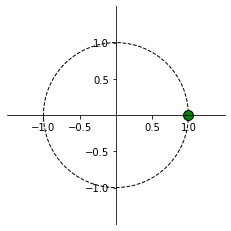

(array([1.]), array([], dtype=float64), 1.9)

In [8]:
import numpy as np
from scipy import signal
a = np.array([1.0])
b = np.array([1.9,-1.9])
zplane(b,a)


<ipython-input-9-7a404c00b644>:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(np.abs(H)), 'b')


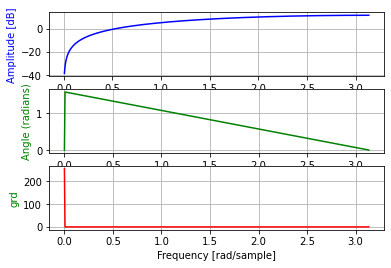

In [9]:
w, H = signal.freqz(b,a)


import matplotlib.pyplot as plt
plt.subplot(311)
plt.plot(w, 20 * np.log10(np.abs(H)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.subplot(312)
angles = np.unwrap(np.angle(H))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')

plt.subplot(313)
grd = np.diff(angles)/np.diff(w)
grd_temp=np.append(grd,0)
plt.plot(w, grd_temp, 'r')
plt.ylabel('grd', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.show()

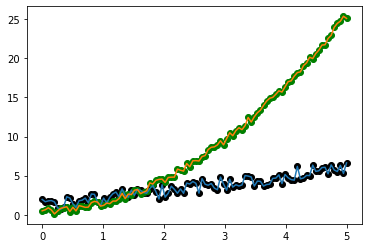

In [14]:
import numpy as np
import pylab as plt

X = np.linspace(0,5,100)
Y1 = X + 2*np.random.random(X.shape)
Y2 = X**2 + np.random.random(X.shape)
plt.plot(X,Y1)
plt.plot(X,Y2)
plt.scatter(X,Y1,color='k')
plt.scatter(X,Y2,color='g')
plt.show()

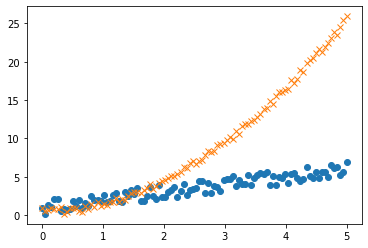

In [15]:
import numpy as np
import pylab as plt

X = np.linspace(0,5,100)
Y1 = X + 2*np.random.random(X.shape)
Y2 = X**2 + np.random.random(X.shape)

fig, ax = plt.subplots()
ax.plot(X,Y1,'o')
ax.plot(X,Y2,'x')
plt.show()

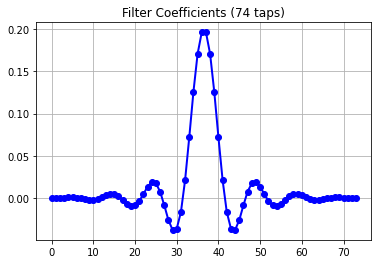

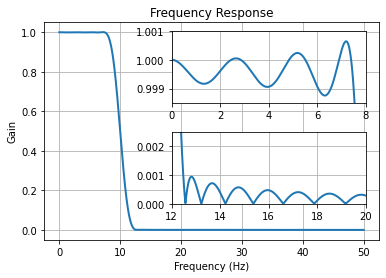

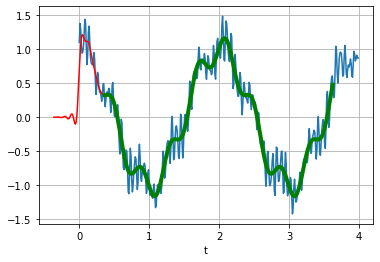

In [16]:
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show


#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

sample_rate = 100.0
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)


#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 10.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)

#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)

#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(3)
# Plot the original signal.
plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)

xlabel('t')
grid(True)

show()


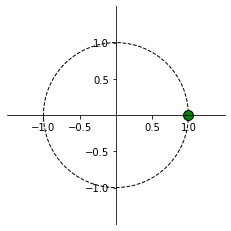

<ipython-input-19-7af432bd2e29>:12: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(np.abs(H)), 'b')


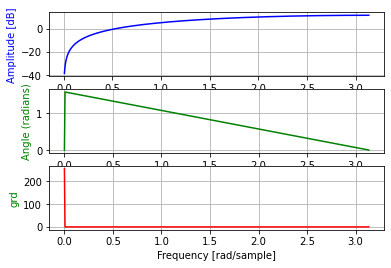

In [19]:
import numpy as np
from scipy import signal
a = np.array([1.0])
b = np.array([1.9,-1.9])
zplane(b,a)

w, H = signal.freqz(b,a)


import matplotlib.pyplot as plt
plt.subplot(311)
plt.plot(w, 20 * np.log10(np.abs(H)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.subplot(312)
angles = np.unwrap(np.angle(H))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')

plt.subplot(313)
grd = np.diff(angles)/np.diff(w)
grd_temp=np.append(grd,0)
plt.plot(w, grd_temp, 'r')
plt.ylabel('grd', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.show()

In [71]:
#https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html
#https://numpy.org/doc/stable/reference/routines.fft.html

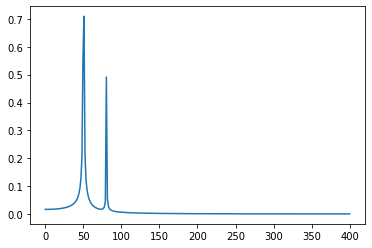

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [33]:
from scipy.fft import fft, ifft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
y
yinv = ifft(y)
yinv

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

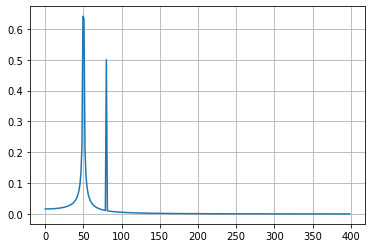

In [34]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

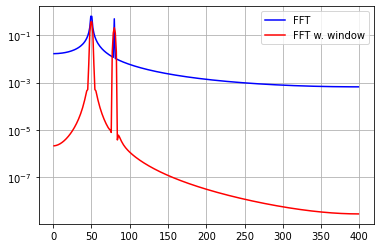

In [35]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
from scipy.signal import blackman
w = blackman(N)
ywf = fft(y*w)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

In [37]:
from scipy.fft import fftfreq
freq = fftfreq(8, 0.125)
freq

array([ 0.,  1.,  2.,  3., -4., -3., -2., -1.])

In [38]:
from scipy.fft import fftshift
x = np.arange(8)
fftshift(x)

array([4, 5, 6, 7, 0, 1, 2, 3])

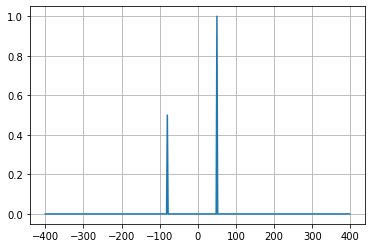

In [39]:
from scipy.fft import fft, fftfreq, fftshift
# number of signal points
N = 400
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()

In [40]:
from scipy.fft import fft, rfft, irfft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5, 1.0])
fft(x)


array([ 5.5 -0.j        ,  2.25-0.4330127j , -2.75-1.29903811j,
        1.5 -0.j        , -2.75+1.29903811j,  2.25+0.4330127j ])

In [42]:
yr = rfft(x)
yr

array([ 5.5 +0.j        ,  2.25-0.4330127j , -2.75-1.29903811j,
        1.5 +0.j        ])

In [43]:
irfft(yr)

array([ 1. ,  2. ,  1. , -1. ,  1.5,  1. ])

In [44]:
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])


In [45]:
fft(x)

array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [47]:
yr = rfft(x)
yr

array([ 4.5       +0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j])

In [48]:
irfft(yr)


array([ 1.70788987,  2.40843925, -0.37366961,  0.75734049])

In [49]:
irfft(yr, n=len(x))

array([ 1. ,  2. ,  1. , -1. ,  1.5])

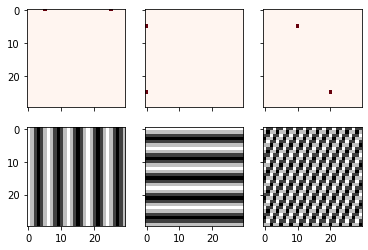

In [50]:
from scipy.fft import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
N = 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
Z = ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = ifftn(xf)
ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
Z = ifftn(xf)
ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)
plt.show()

In [53]:
from scipy.fft import dct, idct
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
dct(dct(x, type=2, norm='ortho'), type=3, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [54]:
dct(dct(x, type=2), type=3)

array([ 10.,  20.,  10., -10.,  15.])

In [55]:
# Normalized inverse: no scaling factor
idct(dct(x, type=2), type=2)


array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [56]:
dct(dct(x, type=1, norm='ortho'), type=1, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [57]:
dct(dct(x, type=1), type=1)

array([ 8., 16.,  8., -8., 12.])

In [58]:
idct(dct(x, type=1), type=1)

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [59]:
dct(dct(x, type=4, norm='ortho'), type=4, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [60]:
# Unnormalized round-trip via DCT-IV: scaling factor 2*N = 10
dct(dct(x, type=4), type=4)
# Normalized inverse: no scaling factor
idct(dct(x, type=4), type=4)

array([ 1. ,  2. ,  1. , -1. ,  1.5])

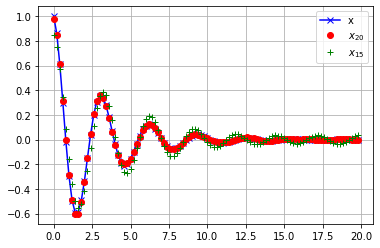

In [61]:
from scipy.fft import dct, idct
import matplotlib.pyplot as plt
N = 100
t = np.linspace(0,20,N, endpoint=False)
x = np.exp(-t/3)*np.cos(2*t)
y = dct(x, norm='ortho')
window = np.zeros(N)
window[:20] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)
plt.plot(t, x, '-bx')
plt.plot(t, yr, 'ro')
window = np.zeros(N)
window[:15] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)
plt.plot(t, yr, 'g+')
plt.legend(['x', '$x_{20}$', '$x_{15}$'])
plt.grid()
plt.show()


In [63]:
from scipy.fft import dst, idst
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
dst(dst(x, type=2, norm='ortho'), type=3, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [64]:
dst(dst(x, type=2), type=3)

array([ 10.,  20.,  10., -10.,  15.])

In [65]:
idst(dst(x, type=2), type=2)

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [67]:
dst(dst(x, type=1, norm='ortho'), type=1, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [68]:
 # scaling factor 2*(N+1) = 12
dst(dst(x, type=1), type=1)

array([ 12.,  24.,  12., -12.,  18.])

In [69]:
 # no scaling factor
idst(dst(x, type=1), type=1)

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [72]:
#https://realpython.com/python-scipy-fft/

In [74]:
import scipy, matplotlib
print(scipy.__file__)

C:\Users\jackl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\__init__.py


In [75]:
 print(matplotlib.__file__)

C:\Users\jackl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\__init__.py


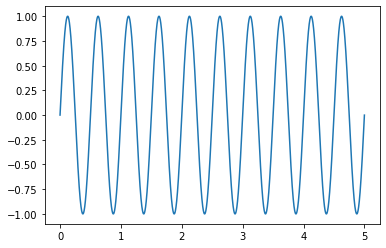

In [76]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()


In [77]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

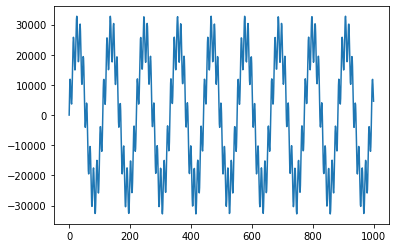

In [78]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

In [79]:
from scipy.io.wavfile import write

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("mysinewave.wav", SAMPLE_RATE, normalized_tone)

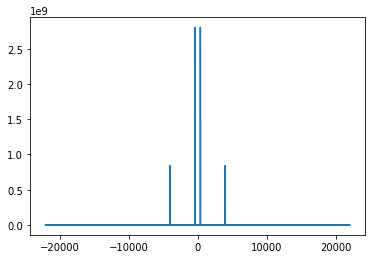

In [80]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [82]:
yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

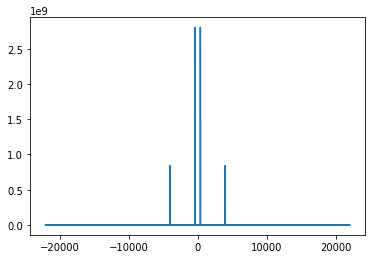

In [85]:
plt.plot(xf, np.abs(yf))
plt.show()b

In [86]:
yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

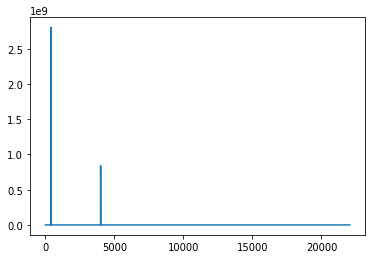

In [87]:
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [88]:
# The maximum frequency is half the sample rate
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Our target frequency is 4000 Hz
target_idx = int(points_per_freq * 4000)

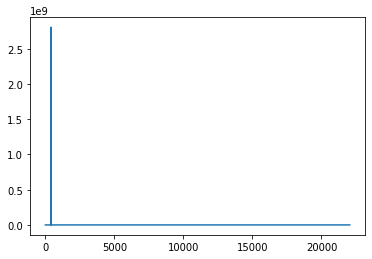

In [89]:
yf[target_idx - 1 : target_idx + 2] = 0

plt.plot(xf, np.abs(yf))
plt.show()

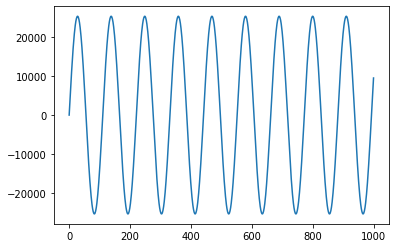

In [90]:
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig[:1000])
plt.show()

In [91]:
norm_new_sig = np.int16(new_sig * (32767 / new_sig.max()))

write("clean.wav", SAMPLE_RATE, norm_new_sig)